<a href="https://colab.research.google.com/github/adityav1810/Semester_5_Labs/blob/master/ECSE381L-DeepLearning/LAB5/Lab5_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
train_path='https://raw.githubusercontent.com/sknepal/DHDD_CSV/master/train.csv'
test_path='https://raw.githubusercontent.com/sknepal/DHDD_CSV/master/test.csv'

In [22]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [80]:
raw_data=pd.read_csv(train_path,skiprows = 1,header=None)

In [81]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
raw_data.shape

(16999, 1025)

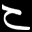

8


In [83]:
cv2_imshow(raw_data.loc[0,1:].to_numpy().reshape(32,32))
print(raw_data.loc[0,0])

In [84]:
def preprocess_data(raw_data):
  X=[]
  minmax=MinMaxScaler()
  onehot_enc=OneHotEncoder()
  for i in range(raw_data.shape[0]):
    X.append(minmax.fit_transform(raw_data.loc[i,1:].to_numpy().reshape(32,32)).flatten())
  # y=raw_data.loc[:,0].to_numpy()
  y=raw_data[0]
  

  return np.array(X),y

In [85]:

X,y=preprocess_data(raw_data)

In [86]:
X.shape

(16999, 1024)

In [87]:
y.shape

(16999,)

In [88]:
def run_model(X,y,nodes):
  model = Sequential()
  model.add(Dense(nodes, input_dim=1024, activation='relu'))
  model.add(Dense(10, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[tf.keras.metrics.CategoricalAccuracy()])
  hist=model.fit(X, to_categorical(y), epochs=50, verbose=0)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['categorical_accuracy'])
  plt.legend(['Loss','Accuracy'])
  plt.show()
  

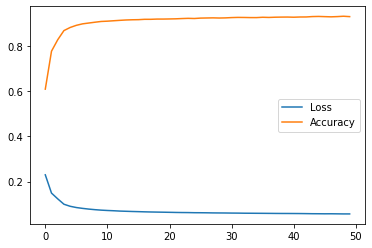

In [89]:
# nodes=[8, 16, 32,64, 128, 256, 512 ,1028]
nodes=[8]
for node in nodes:
  run_model(X,y,node)

In [90]:
test_data=pd.read_csv(test_path,skiprows = 1,header=None)

In [91]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


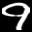

1


In [92]:
cv2_imshow(test_data.loc[0,1:].to_numpy().reshape(32,32))
print(test_data.loc[0,0])

In [93]:
X_test,y_test=preprocess_data(test_data)

In [94]:
y_pred=model.predict(X_test)

In [95]:
y_test[0]

1

In [96]:
y_pred[0]

array([6.1936438e-02, 7.4170530e-01, 8.0615282e-04, 6.3258049e-05,
       1.3007856e-05, 3.1505179e-17, 3.8686395e-04, 3.5533092e-06,
       6.9245875e-06, 1.2217614e-01], dtype=float32)

In [97]:
test_data[0]

0       1
1       8
2       8
3       6
4       8
       ..
2994    9
2995    6
2996    0
2997    6
2998    8
Name: 0, Length: 2999, dtype: int64